In [8]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import patches

print("Pandas Version:", pd.__version__)

Pandas Version: 0.24.1


In [11]:
# Load the Tranining Set

train = pd.read_csv('aedes_labels.csv')
train.head(10)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,0b57cceb-4d17-417c-a3c5-ffb0b62d8b59.jpg,640,480,full,169,134,237,177
1,0b57cceb-4d17-417c-a3c5-ffb0b62d8b59.jpg,640,480,full,481,168,547,225
2,0b57cceb-4d17-417c-a3c5-ffb0b62d8b59.jpg,640,480,full,470,332,544,389
3,0b57cceb-4d17-417c-a3c5-ffb0b62d8b59.jpg,640,480,full,489,34,553,89
4,0ca5874c-22db-4016-8d5c-5d2626dda567.jpg,640,480,full,576,221,607,280
5,0ca5874c-22db-4016-8d5c-5d2626dda567.jpg,640,480,full,250,319,311,360
6,0ca5874c-22db-4016-8d5c-5d2626dda567.jpg,640,480,full,212,335,268,370
7,0ca5874c-22db-4016-8d5c-5d2626dda567.jpg,640,480,full,173,271,223,316
8,0ca5874c-22db-4016-8d5c-5d2626dda567.jpg,640,480,full,288,213,344,237
9,0ca5874c-22db-4016-8d5c-5d2626dda567.jpg,640,480,full,279,233,355,258


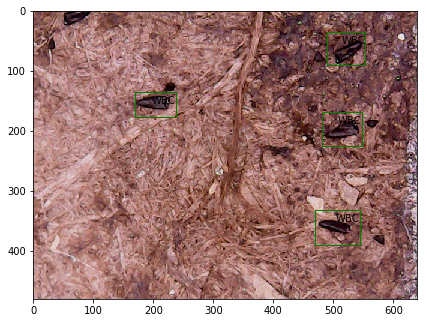

In [13]:
# Mark the Aedes egg using one of the training set images

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

image = plt.imread('data/training/' + train.filename[0])
plt.imshow(image)

for _,row in train[train.filename == '0b57cceb-4d17-417c-a3c5-ffb0b62d8b59.jpg'].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    edgecolor = 'g'
    
    ax.annotate('WBC', xy=(xmax-40,ymin+20))
    
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [14]:
# Convert the CSV file to TXT

data = pd.DataFrame()
data['format'] = train['filename']

for i in range(data.shape[0]):
    data['format'][i] = '../../data/training/' + data['format'][i]
    
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) \
        + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) \
        + ',' + train['class'][i]

data.to_csv('annotate.txt', header = None, index = None, sep = ' ')